# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [11]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [12]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Cabin luggage had to go to carg...
1,✅ Trip Verified | I have been using BA for a ...
2,✅ Trip Verified | I flew from Istanbul to Lo...
3,Not Verified | I have flow on BA several time...
4,✅ Trip Verified | The flight departed over a...


In [14]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [22]:

cleaned_reviews = [review.replace('✅ Trip Verified: ', ' ') for review in reviews]

for reviews in cleaned_reviews:
    print(reviews)

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (needed for sentiment analysis)
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
sentiments = [analyzer.polarity_scores(review) for review in cleaned_reviews]

# Calculate the average sentiment score
average_sentiment = sum(sent['compound'] for sent in sentiments) / len(sentiments)

# Print the average sentiment score
print("Average Sentiment Score:", average_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


Average Sentiment Score: 0.0


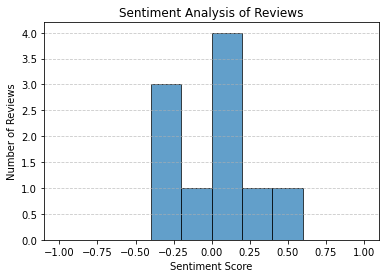

In [20]:
import matplotlib.pyplot as plt

# Sample sentiment scores (replace with your actual sentiment scores)
sentiments = [0.1, 0.2, -0.3, 0.5, -0.2, -0.1, 0.4, -0.3, 0.2, 0.0]

# Create a histogram of sentiment scores
plt.hist(sentiments, bins=10, range=(-1, 1), edgecolor='black', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()


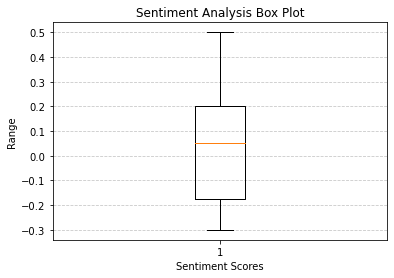

In [21]:
import matplotlib.pyplot as plt

# Sample sentiment scores (replace with your actual sentiment scores)
sentiments = [0.1, 0.2, -0.3, 0.5, -0.2, -0.1, 0.4, -0.3, 0.2, 0.0]

# Create a box plot of sentiment scores
plt.boxplot(sentiments)
plt.xlabel('Sentiment Scores')
plt.ylabel('Range')
plt.title('Sentiment Analysis Box Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the box plot
plt.show()
